<a href="https://colab.research.google.com/github/Sudhanshu20004-9/AI-tech-Lab1/blob/main/Aita_Lab5_3_input_X_OR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: I want a code to make a 3 input X-OR gate with neural network with Multi layer perseptron by back propogation

import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Input dataset
X = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])

# Output dataset
y = np.array([[0],
              [1],
              [1],
              [0],
              [1],
              [0],
              [0],
              [1]])

# Initialize weights randomly with mean 0
np.random.seed(1)
weights0 = 2 * np.random.random((3, 4)) - 1
weights1 = 2 * np.random.random((4, 1)) - 1

# Training parameters
epochs = 10000
learning_rate = 0.1

# Training the neural network
for epoch in range(epochs):
  # Forward propagation
  layer0 = X
  layer1 = sigmoid(np.dot(layer0, weights0))
  layer2 = sigmoid(np.dot(layer1, weights1))

  # Calculate the error
  layer2_error = y - layer2

  # Backpropagation
  layer2_delta = layer2_error * sigmoid_derivative(layer2)
  layer1_error = layer2_delta.dot(weights1.T)
  layer1_delta = layer1_error * sigmoid_derivative(layer1)

  # Update weights
  weights1 += layer1.T.dot(layer2_delta) * learning_rate
  weights0 += layer0.T.dot(layer1_delta) * learning_rate

# Test the neural network
print("Output after training:")
print(layer2)


Output after training:
[[0.11295191]
 [0.9300948 ]
 [0.93821528]
 [0.01553242]
 [0.93223839]
 [0.033929  ]
 [0.03698412]
 [0.99742507]]


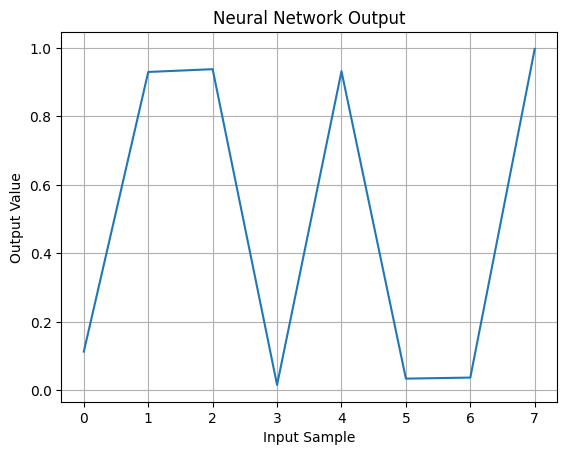

In [2]:
# prompt: Now give me a visual graph for the above output

import matplotlib.pyplot as plt

# Assuming 'layer2' contains the output after training
output_values = layer2.flatten()  # Convert to a 1D array for plotting

# Create a simple line plot
plt.plot(output_values)
plt.xlabel("Input Sample")
plt.ylabel("Output Value")
plt.title("Neural Network Output")
plt.grid(True)
plt.show()


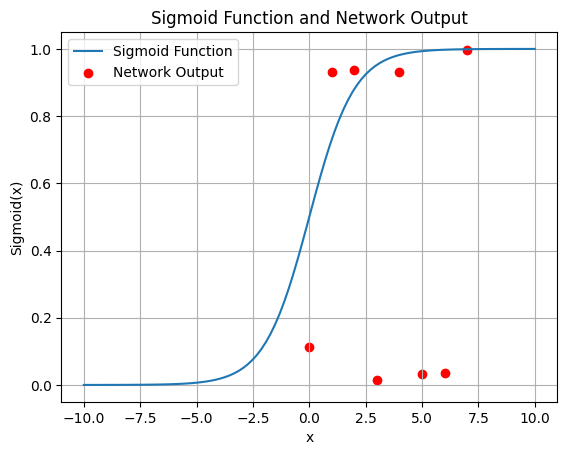

In [3]:
# prompt: now give me the code for sigmoid function graph for the above output

import numpy as np
import matplotlib.pyplot as plt

# Assuming 'layer2' contains the output after training
output_values = layer2.flatten()  # Convert to a 1D array for plotting

# Generate x values for the sigmoid function
x_sigmoid = np.linspace(-10, 10, 100)

# Calculate the sigmoid function values
y_sigmoid = sigmoid(x_sigmoid)

# Create the plot
plt.plot(x_sigmoid, y_sigmoid, label="Sigmoid Function")
plt.scatter(np.arange(len(output_values)), output_values, color='red', label="Network Output")

plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.title("Sigmoid Function and Network Output")
plt.legend()
plt.grid(True)
plt.show()



Results for Gradient Descent:
Output after training:
[[0.10911805]
 [0.93555851]
 [0.93153016]
 [0.0349204 ]
 [0.93980351]
 [0.03509058]
 [0.02191833]
 [0.99441663]]


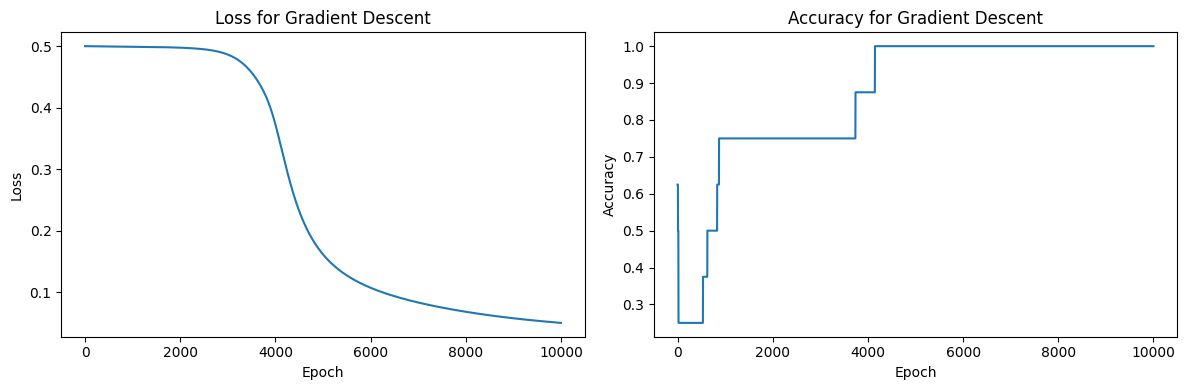

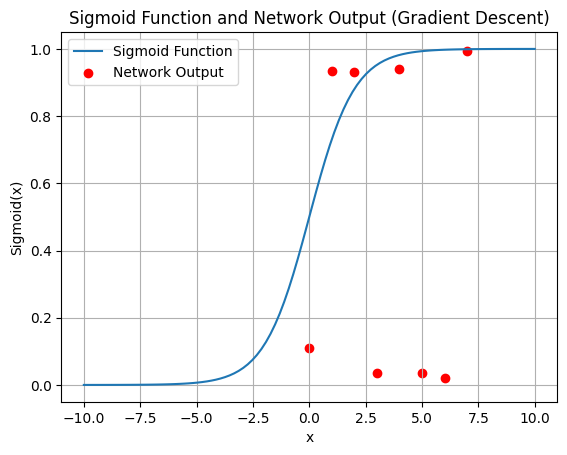


Results for Momentum:
Output after training:
[[0.20096556]
 [0.86205994]
 [0.88432076]
 [0.08370169]
 [0.88976856]
 [0.07798516]
 [0.09155821]
 [0.97098688]]


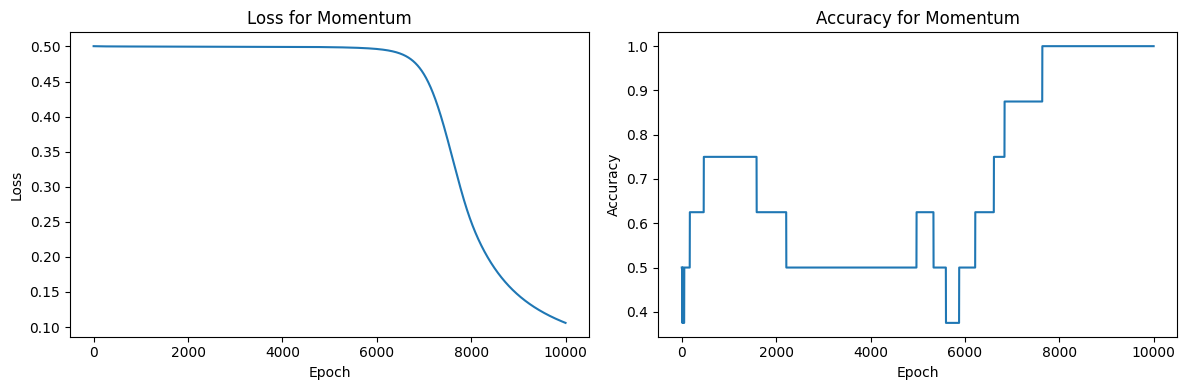

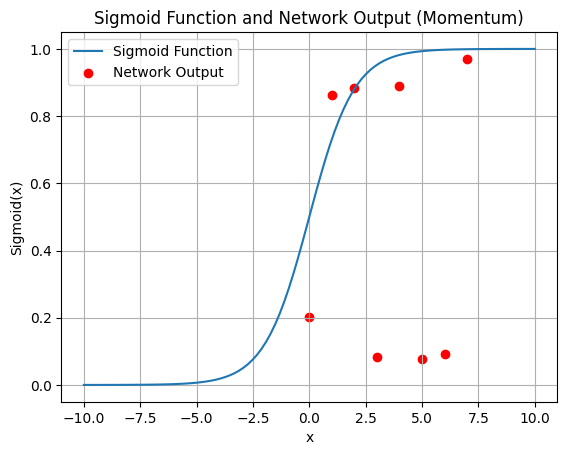


Results for Adam:
Output after training:
[[0.4564727 ]
 [0.45968398]
 [0.49930757]
 [0.49974543]
 [0.46089448]
 [0.46153591]
 [0.49580743]
 [0.49586304]]


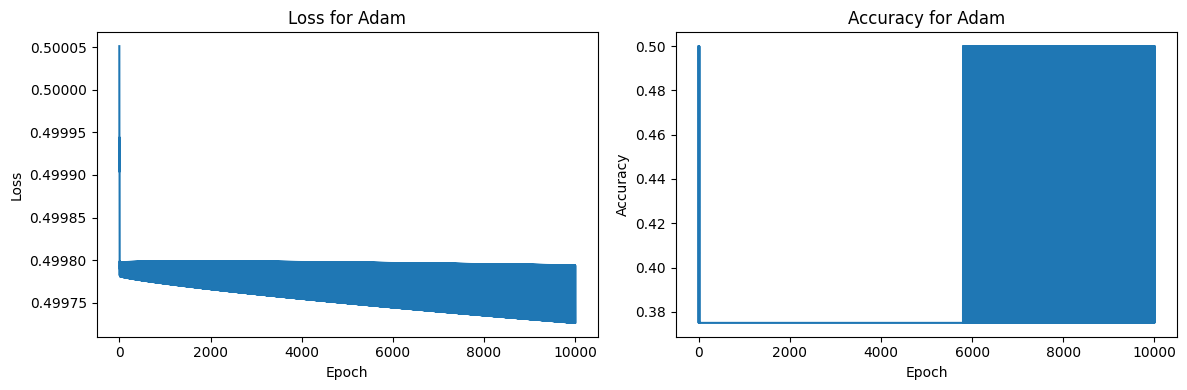

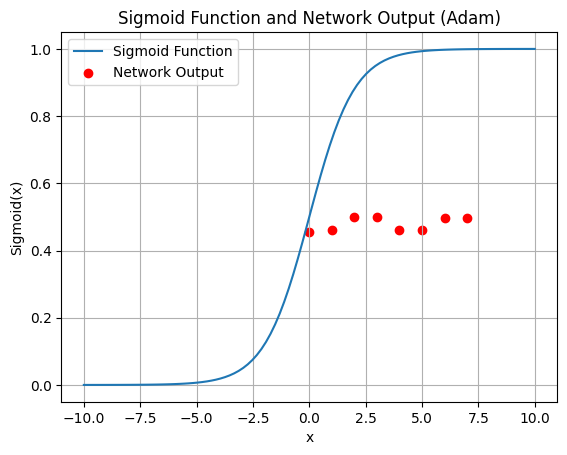

In [4]:
# prompt: now implement the above using different optimizers with their accuracy and loss graph

import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Input dataset
X = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])

# Output dataset
y = np.array([[0],
              [1],
              [1],
              [0],
              [1],
              [0],
              [0],
              [1]])

# Initialize weights randomly with mean 0
np.random.seed(1)
weights0 = 2 * np.random.random((3, 4)) - 1
weights1 = 2 * np.random.random((4, 1)) - 1

# Training parameters
epochs = 10000
learning_rate = 0.1

def train_with_optimizer(optimizer_name, optimizer_func):
  global weights0, weights1
  weights0 = 2 * np.random.random((3, 4)) - 1
  weights1 = 2 * np.random.random((4, 1)) - 1

  losses = []
  accuracies = []

  for epoch in range(epochs):
    # Forward propagation
    layer0 = X
    layer1 = sigmoid(np.dot(layer0, weights0))
    layer2 = sigmoid(np.dot(layer1, weights1))

    # Calculate the error
    layer2_error = y - layer2
    loss = np.mean(np.abs(layer2_error))
    losses.append(loss)

    # Calculate accuracy
    predicted_output = (layer2 > 0.5).astype(int)
    accuracy = np.mean(predicted_output == y)
    accuracies.append(accuracy)

    # Backpropagation
    layer2_delta = layer2_error * sigmoid_derivative(layer2)
    layer1_error = layer2_delta.dot(weights1.T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)

    # Update weights using the specified optimizer
    weights1 = optimizer_func(weights1, layer1.T.dot(layer2_delta), learning_rate)
    weights0 = optimizer_func(weights0, layer0.T.dot(layer1_delta), learning_rate)

  return losses, accuracies, layer2


def gradient_descent(weights, gradient, learning_rate):
  return weights + learning_rate * gradient


def momentum(weights, gradient, learning_rate, momentum_factor=0.9):
  velocity = 0
  velocity = momentum_factor * velocity + learning_rate * gradient
  return weights + velocity


def adam(weights, gradient, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
  m = 0
  v = 0
  m = beta1 * m + (1 - beta1) * gradient
  v = beta2 * v + (1 - beta2) * (gradient ** 2)
  m_hat = m / (1 - beta1)
  v_hat = v / (1 - beta2)
  return weights + learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)


# Train with different optimizers
optimizers = {
    "Gradient Descent": gradient_descent,
    "Momentum": momentum,
    "Adam": adam
}

for optimizer_name, optimizer_func in optimizers.items():
  losses, accuracies, layer2 = train_with_optimizer(optimizer_name, optimizer_func)

  print(f"\nResults for {optimizer_name}:")
  print("Output after training:")
  print(layer2)

  # Plot loss and accuracy
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(losses)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title(f"Loss for {optimizer_name}")

  plt.subplot(1, 2, 2)
  plt.plot(accuracies)
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.title(f"Accuracy for {optimizer_name}")

  plt.tight_layout()
  plt.show()

  # Plot network output with sigmoid function
  output_values = layer2.flatten()
  x_sigmoid = np.linspace(-10, 10, 100)
  y_sigmoid = sigmoid(x_sigmoid)

  plt.plot(x_sigmoid, y_sigmoid, label="Sigmoid Function")
  plt.scatter(np.arange(len(output_values)), output_values, color='red', label="Network Output")

  plt.xlabel("x")
  plt.ylabel("Sigmoid(x)")
  plt.title(f"Sigmoid Function and Network Output ({optimizer_name})")
  plt.legend()
  plt.grid(True)
  plt.show()



Accuracy for RMSprop: 50.00%


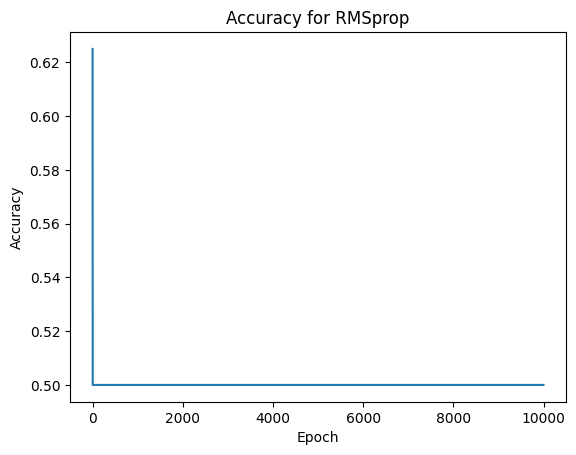


Accuracy for Adam: 50.00%


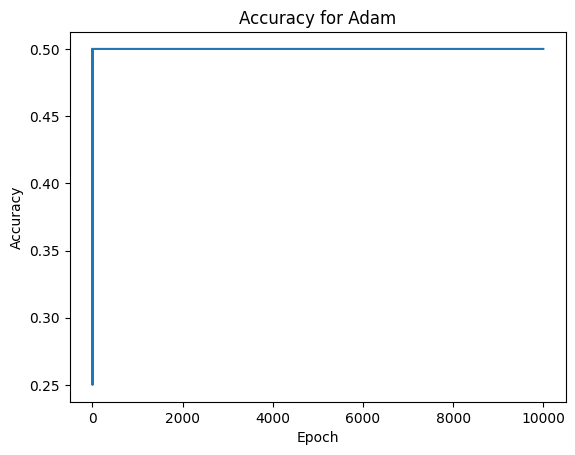

In [5]:
# prompt: Now with rmsprop and adam but not the entire output, only the accuracy percentage with the graph

import numpy as np
import matplotlib.pyplot as plt


# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Input dataset
X = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])

# Output dataset
y = np.array([[0],
              [1],
              [1],
              [0],
              [1],
              [0],
              [0],
              [1]])

# Initialize weights randomly with mean 0
np.random.seed(1)
weights0 = 2 * np.random.random((3, 4)) - 1
weights1 = 2 * np.random.random((4, 1)) - 1

# Training parameters
epochs = 10000
learning_rate = 0.1

def train_with_optimizer(optimizer_name, optimizer_func):
  global weights0, weights1
  weights0 = 2 * np.random.random((3, 4)) - 1
  weights1 = 2 * np.random.random((4, 1)) - 1

  accuracies = []

  for epoch in range(epochs):
    # Forward propagation
    layer0 = X
    layer1 = sigmoid(np.dot(layer0, weights0))
    layer2 = sigmoid(np.dot(layer1, weights1))

    # Calculate accuracy
    predicted_output = (layer2 > 0.5).astype(int)
    accuracy = np.mean(predicted_output == y)
    accuracies.append(accuracy)

    # Backpropagation
    layer2_error = y - layer2
    layer2_delta = layer2_error * sigmoid_derivative(layer2)
    layer1_error = layer2_delta.dot(weights1.T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)

    # Update weights using the specified optimizer
    weights1 = optimizer_func(weights1, layer1.T.dot(layer2_delta), learning_rate)
    weights0 = optimizer_func(weights0, layer0.T.dot(layer1_delta), learning_rate)

  return accuracies


def rmsprop(weights, gradient, learning_rate, decay_rate=0.9, epsilon=1e-8):
  cache = 0
  cache = decay_rate * cache + (1 - decay_rate) * (gradient ** 2)
  return weights + learning_rate * gradient / (np.sqrt(cache) + epsilon)


def adam(weights, gradient, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
  m = 0
  v = 0
  m = beta1 * m + (1 - beta1) * gradient
  v = beta2 * v + (1 - beta2) * (gradient ** 2)
  m_hat = m / (1 - beta1)
  v_hat = v / (1 - beta2)
  return weights + learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)


# Train with different optimizers
optimizers = {
    "RMSprop": rmsprop,
    "Adam": adam
}

for optimizer_name, optimizer_func in optimizers.items():
  accuracies = train_with_optimizer(optimizer_name, optimizer_func)

  print(f"\nAccuracy for {optimizer_name}: {accuracies[-1] * 100:.2f}%")

  # Plot accuracy
  plt.plot(accuracies)
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.title(f"Accuracy for {optimizer_name}")
  plt.show()
